# Pymaceuticals Inc.
---

### Analysis

     The available data set is almost evenly presented with both Male and Female mice. A slightly higher sample of mice treated with Capomulin and Ramicane in comparison to another drug regimen treatments.
     
     With the Summary Statistics Table we can observe that the smaller Tumor Volume results are obtained with Ramicane and Capomulin treatment. Additionally, these 2 treatments give the most consistent result. This consistency is also shown for the final time point in "Distribution of the final Tumor Volume for all the mice" plot, where in comparison with another 2 treatments Ramicane and Capomulin show smaller IQR's with no outliers.
     
     The correlation between mouse weight and the average tumor volume for Capomulin treatment is 0.84, that represents a strong positive association between these 2 values, it means that the mouse weight is changing mostly with the tumor increase/decrease.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how='outer', sort=False)
# Sort and display the data table for preview
sorted_df = combined_df.sort_values(by=["Timepoint","Tumor Volume (mm3)"])
sorted_df.reset_index(drop=True, inplace=True)
sorted_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_df = sorted_df.groupby("Mouse ID")
len(mouse_df["Mouse ID"])

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = sorted_df.loc[sorted_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_df

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_g989 = sorted_df.loc[sorted_df["Mouse ID"] == "g989",:]
all_g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
108,g989,0,45.000000,0,Propriva,Female,21,26
435,g989,5,47.570392,0,Propriva,Female,21,26
469,g989,5,48.786801,0,Propriva,Female,21,26
661,g989,10,49.880528,0,Propriva,Female,21,26
697,g989,10,51.745156,0,Propriva,Female,21,26
847,g989,15,51.325852,1,Propriva,Female,21,26
892,g989,15,53.442020,0,Propriva,Female,21,26
1066,g989,20,54.657650,1,Propriva,Female,21,26
1079,g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = sorted_df.drop(sorted_df[sorted_df["Mouse ID"] == 'g989'].index)
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_df = clean_df.groupby("Mouse ID")
len(clean_mouse_df["Mouse ID"])

248

## Summary Statistics

In [7]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_regimen_mean = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
drug_regimen_median = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
drug_regimen_variance = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
drug_regimen_stdiv = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
drug_regimen_sterr = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame(
    {"Mean Tumor Volume":drug_regimen_mean,
     "Median Tumor Volume":drug_regimen_median,
     "Tumor Volume Variance":drug_regimen_variance,
     "Tumor Volume Std.Dev.":drug_regimen_stdiv,
     "Tumor Volume Std.Err.":drug_regimen_sterr
    })
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})\
                                                         .style.set_properties(**{'text-align': 'right'})

## Bar and Pie Charts

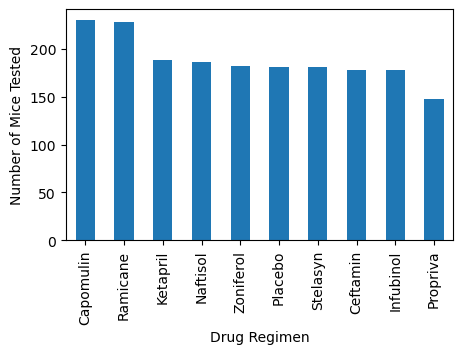

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_count = clean_df.groupby(["Drug Regimen"]).count()\
["Mouse ID"].reset_index(name="Mouse ID").sort_values(['Mouse ID'], ascending=False)
mice_count = mice_count.set_index("Drug Regimen")

mice_count.plot(kind="bar", figsize=(5,3), 
                xlabel=('Drug Regimen'),
                ylabel=('Number of Mice Tested'),
                legend=False)
plt.show()


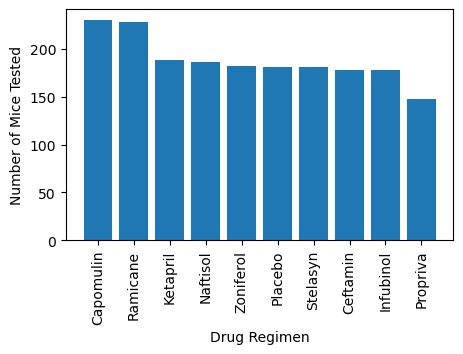

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize=(5,3))
plt.bar(mice_count.index, mice_count["Mouse ID"])
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
tick_locations = mice_count.index
plt.xticks(tick_locations, mice_count.index, rotation = 'vertical')
plt.show()


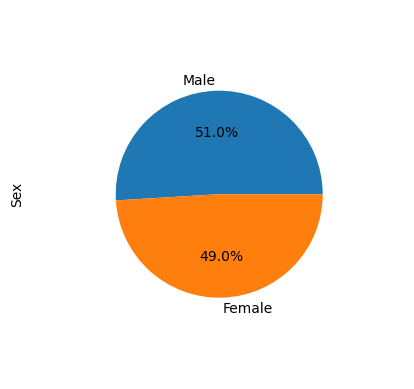

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender= clean_df.groupby(["Sex"]).count()["Timepoint"]\
.reset_index(name="Timepoint").sort_values(["Timepoint"], ascending=False)
gender = gender.set_index("Sex")

gender.plot(kind="pie", subplots =True, radius = 0.7,
            ylabel=('Sex'), legend=False, label=True, autopct='%1.1f%%'
           )
plt.show()

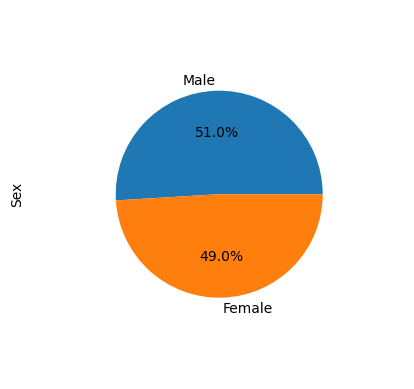

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
plt.pie(gender["Timepoint"], labels=labels, autopct='%1.1f%%', radius = 0.7)
plt.ylabel("Sex")

plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_new = clean_df.groupby(["Mouse ID"])
last_total = last_new.last()

In [14]:
# Display the data table that includes final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
last_four = (last_total.loc[(last_total["Drug Regimen"] == "Capomulin") |\
                            (last_total["Drug Regimen"] == "Ramicane") |\
                           (last_total["Drug Regimen"] == "Infubinol") |\
                           (last_total["Drug Regimen"] == "Ceftamin"), :])
last_four = last_four.sort_values(["Drug Regimen"]).reset_index(drop=True)
last_four

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,45,38.846876,1,Capomulin,Male,17,19
1,45,38.125164,1,Capomulin,Female,7,23
2,35,38.753265,1,Capomulin,Female,21,21
3,45,31.023923,3,Capomulin,Male,18,17
4,45,40.159220,2,Capomulin,Female,22,22
...,...,...,...,...,...,...,...
95,45,31.560470,1,Ramicane,Female,4,17
96,45,36.134852,1,Ramicane,Male,8,19
97,45,22.050126,1,Ramicane,Male,21,16
98,45,30.564625,1,Ramicane,Male,18,16


In [15]:
# Put treatments into a list for for loop
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []
# Fill the list with tumor volume data
for treatment in treatments:
       tumor_volume.append(last_four.loc[last_four["Drug Regimen"] == treatment, "Tumor Volume (mm3)"])

In [16]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Create definition for petential outliers calculation
def potential_outliers(tumor_volume): 
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    return outliers
   
# Determine outliers using upper and lower bounds
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
for treatment in treatments:
    tumor_volume = last_four.loc[last_four["Drug Regimen"] == treatment, "Tumor Volume (mm3)"] 
    
    outliers = potential_outliers(tumor_volume)
    
    print(f"{treatment}'s potential outliers: {(outliers)}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 64    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


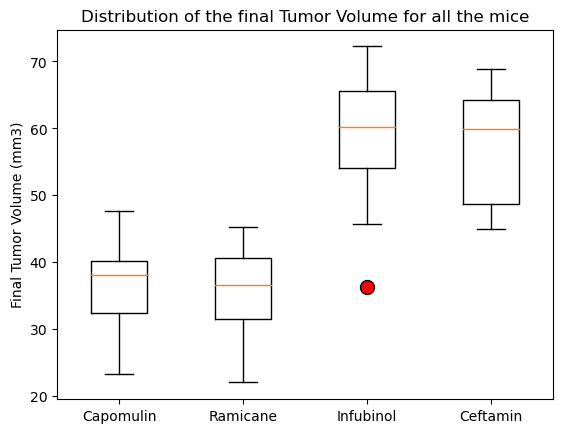

In [17]:
# Create data series for box plot compilation
total_capomulin = last_total.loc[(last_total["Drug Regimen"] == "Capomulin") ,:]
total_ramicane = last_total.loc[(last_total["Drug Regimen"] == "Ramicane") ,:]
total_infubinol = last_total.loc[(last_total["Drug Regimen"] == "Infubinol") ,:]
total_ceftamin = last_total.loc[(last_total["Drug Regimen"] == "Ceftamin") ,:]
                                
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
                                
my_dict = {"Capomulin": total_capomulin["Tumor Volume (mm3)"], "Ramicane": total_ramicane["Tumor Volume (mm3)"],\
          "Infubinol": total_infubinol["Tumor Volume (mm3)"], "Ceftamin": total_ceftamin["Tumor Volume (mm3)"]}
fig, ax = plt.subplots()
flierprops = dict(marker='o', markerfacecolor='red', markersize=10,  markeredgecolor='black')
ax.boxplot(my_dict.values(), flierprops=flierprops)
ax.set_xticklabels(my_dict.keys())
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.set_title("Distribution of the final Tumor Volume for all the mice")
plt.show()


## Line and Scatter Plots

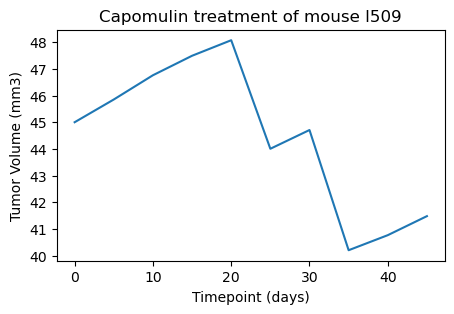

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = clean_df.loc[(clean_df["Mouse ID"] == "l509"),:]

plt.figure(figsize=(5,3))
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])
plt.title ("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.yticks(range(40,49))
plt.show()


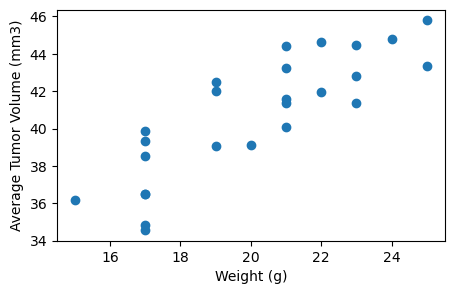

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_treatment = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") ,:]

average_tumor_capomulin = capomulin_treatment.groupby(["Mouse ID","Weight (g)"]).mean()["Tumor Volume (mm3)"]\
.reset_index(name="Tumor Volume (mm3)")

plt.figure(figsize=(5,3))
x_axis = average_tumor_capomulin["Weight (g)"]
y_axis = average_tumor_capomulin["Tumor Volume (mm3)"]
plt.scatter(x_axis, y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


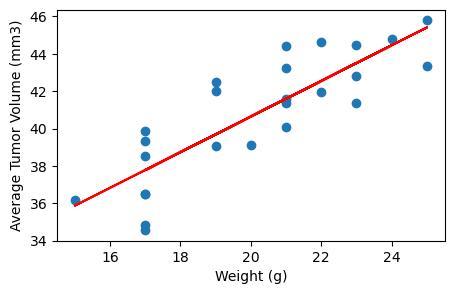

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation between mouse weight and the average tumor volume is \
{round(st.pearsonr(x_axis, y_axis)[0],2)}")

plt.figure(figsize=(5,3))
x_axis = average_tumor_capomulin["Weight (g)"]
y_axis = average_tumor_capomulin["Tumor Volume (mm3)"]
tv_slope, tv_int, tv_r, tv_p, tv_std_err = st.linregress(x_axis, y_axis)
tv_fit = tv_slope * x_axis + tv_int
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,tv_fit, color='r')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()